##Problem Statement
#####A company wants to know the type of customers that will click on the advertisement.

#####Dataset: https://www.kaggle.com/datasets/reddynitin/facebook-ads

##Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

##Import Dataset

In [2]:
#Read csv dataset using Pandas DataFrame
fb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Facebook Ads Prediction/Facebook_Ads_2.csv", encoding="ISO-8859-1")

In [3]:
#View the first 5 data
fb.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


#####Class 0 means customers do not click on the Facebook ads while class 1 means customers clicked on the Facebook ads.

##EDA

In [4]:
#Determine the dependent variable, Clicked column
click    = fb[fb["Clicked"]==1]
no_click = fb[fb["Clicked"]==0]

In [5]:
print("Total customer: ", len(fb))

print("Number of customer clicked on adv: ", len(click))
print("Percentage Clicked: ", 1.*len(click)/len(fb)*100.0, "%")
 
print("Number of customer Not click on the adv: ", len(no_click))
print("Percentage who not click: ", 1.*len(no_click)/len(fb)*100.0, "%")

Total customer:  499
Number of customer clicked on adv:  250
Percentage Clicked:  50.1002004008016 %
Number of customer Not click on the adv:  249
Percentage who not click:  49.899799599198396 %


In [6]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [14]:
fb.isna().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

#####There is no missing value in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


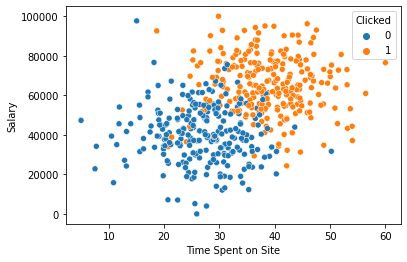

In [7]:
#View the relationship between the time spend on Facebook and the salary of the customer
sns.scatterplot(fb["Time Spent on Site"], fb["Salary"], hue = fb["Clicked"])

#####Customers who spend 40 minutes and salary above $60,000 will likely to clicked on the Facebook Advertisement. This might due to customers has more spare time and has high disposable income.

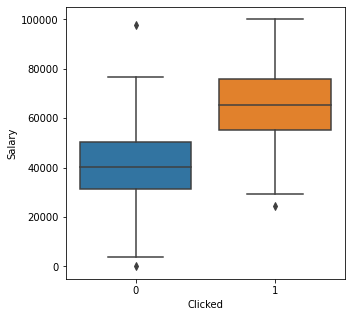

In [8]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Clicked", y="Salary", data=fb)

#####Customers who will clicked on the Facebook advertisement are having high salary than those not click. 

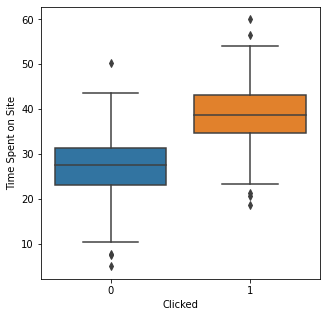

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Clicked", y="Time Spent on Site", data=fb)

#####Customers who will click on the Facebook advertisement will spend more time on Facebook.

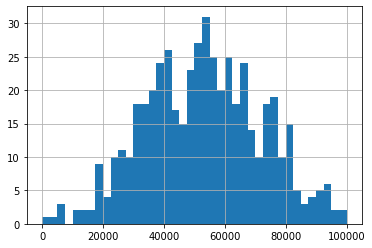

In [10]:
fb["Salary"].hist(bins = 40)

#####Majority of the customers are earning between $30,000 to $80,000.

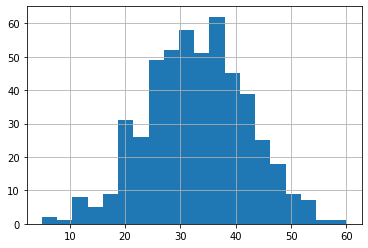

In [11]:
fb["Time Spent on Site"].hist(bins = 20)

#####Majority of the customers will spend 20-40 minutes on Facebook 

##Data Cleaning

In [ ]:
#View the first 5 row of the original data
fb.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [ ]:
#Remove emails, country and names variables as these categorical data is not useful in the model 
fb.drop(columns=["Names", "emails", "Country"], axis=1, inplace=True)
fb.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [ ]:
#Define X and y 
X = fb.drop("Clicked", axis=1).values
y = fb["Clicked"].values

In [ ]:
X.shape

(499, 2)

In [ ]:
y.shape

(499,)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#View the first 5 rows of original data 
X[:5, :2]

In [ ]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
#View the first 5 rows after performed scaling
X[:5, :2]

array([[-0.79945766,  0.12825771],
       [-0.05102869,  1.37859159],
       [-1.31666684, -0.62194482],
       [ 2.3222327 , -0.83044362],
       [ 0.14619557, -0.81928096]])

##Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((399, 2), (399,))

In [ ]:
X_test.shape, y_test.shape

((100, 2), (100,))

In [ ]:
# Fitting Logistic Regression to the training set
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Predict probability for train data
y_proba = lr.predict_proba(X_train)
y_proba

array([[1.05007158e-04, 9.99894993e-01],
       [7.21499846e-03, 9.92785002e-01],
       [4.83202283e-03, 9.95167977e-01],
       [1.18633407e-01, 8.81366593e-01],
       [1.74720754e-02, 9.82527925e-01],
       [9.96855430e-01, 3.14456989e-03],
       [4.82293867e-03, 9.95177061e-01],
       [7.88139130e-03, 9.92118609e-01],
       [3.95242910e-01, 6.04757090e-01],
       [8.14470535e-01, 1.85529465e-01],
       [1.31210986e-03, 9.98687890e-01],
       [9.94076615e-01, 5.92338490e-03],
       [9.55240125e-01, 4.47598748e-02],
       [5.09329673e-01, 4.90670327e-01],
       [4.12416286e-01, 5.87583714e-01],
       [9.95447761e-01, 4.55223895e-03],
       [1.95670974e-03, 9.98043290e-01],
       [7.23689718e-01, 2.76310282e-01],
       [4.48124702e-03, 9.95518753e-01],
       [9.82796416e-01, 1.72035838e-02],
       [9.68092476e-01, 3.19075245e-02],
       [8.78140801e-01, 1.21859199e-01],
       [9.94132429e-01, 5.86757135e-03],
       [9.96750282e-01, 3.24971826e-03],
       [9.990434

In [ ]:
#Predict for train data
y_predict_train = lr.predict(X_train)
y_predict_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
#Check actual train data
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

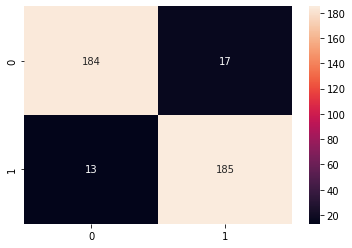

In [ ]:
#Construct confusion matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#Predict on testing set
y_predict_test = lr.predict(X_test)
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
#View on actual test data
y_test

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

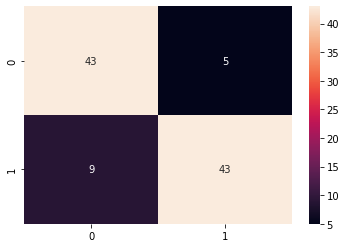

In [ ]:
#Construct confusion matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
#Tabulate classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



#####The model has a precison 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


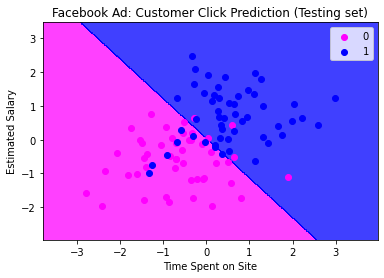

In [ ]:
#Visualize the testing data
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),    #to construct meshgrid
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),    #to predict the dot
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())          #limit the axis
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#####The dots and boudary in magenta color represent customers have not clicked on the Facebook ads while the blue color represent they have clicked on the ads. 
######Misclassification arises when the dots are in different color of boundary. However, the classification report shows that this model able to predict 86% accurate. 